In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from warnings import filterwarnings

# Suppress warnings
filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Import dataset
df = pd.read_csv('CarPrice.csv')

# Shape of the data
print(df.shape)

# Basic information of the dataset
print(df.info())


(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [4]:
# Unique values for categorical columns
print(df['doornumber'].unique())
print(df['cylindernumber'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [5]:
# Replace words with numbers
df['doornumber'].replace({"four": 4, "two": 2}, inplace=True)
df['cylindernumber'].replace({"four": 4, "two": 2, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'eight': 8}, inplace=True)

In [6]:
# Extract 'CompanyName' from 'CarName'
df['CompanyName'] = df['CarName'].apply(lambda x: x.split()[0])

# Correct typos in 'CompanyName'
df['CompanyName'].replace({"maxda": "mazda", "Nissan": "nissan", "porcshce": "porsche", "toyouta": "toyota",
                            "vokswagen": "volkswagen", "vw": "volkswagen"}, inplace=True)

In [7]:
print(f"Number of duplicated rows: {len(df[df.duplicated()])}")

Number of duplicated rows: 0


In [8]:
# Check for missing values
print(f"Total missing values: {df.isnull().sum().sum()}")

Total missing values: 0


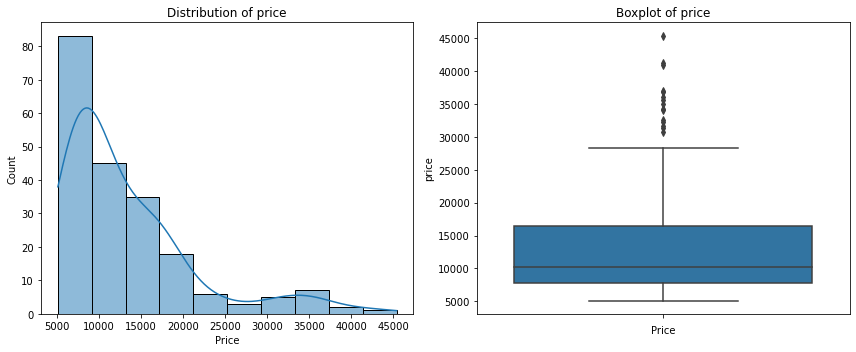

In [9]:
# Plot distribution and boxplot for 'price'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

sns.boxplot(data=df, y='price', ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("Price")

plt.tight_layout()
plt.show()


In [10]:
# Log-transform the 'price' column
df['price'] = np.log(df['price'])

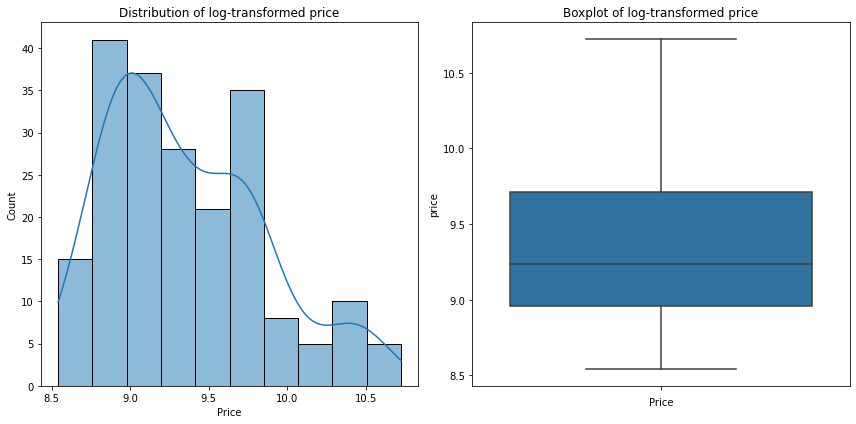

In [11]:
# Plot transformed 'price'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of log-transformed price")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

sns.boxplot(data=df, y='price', ax=axes[1])
axes[1].set_title("Boxplot of log-transformed price")
axes[1].set_xlabel("Price")

plt.tight_layout()
plt.show()

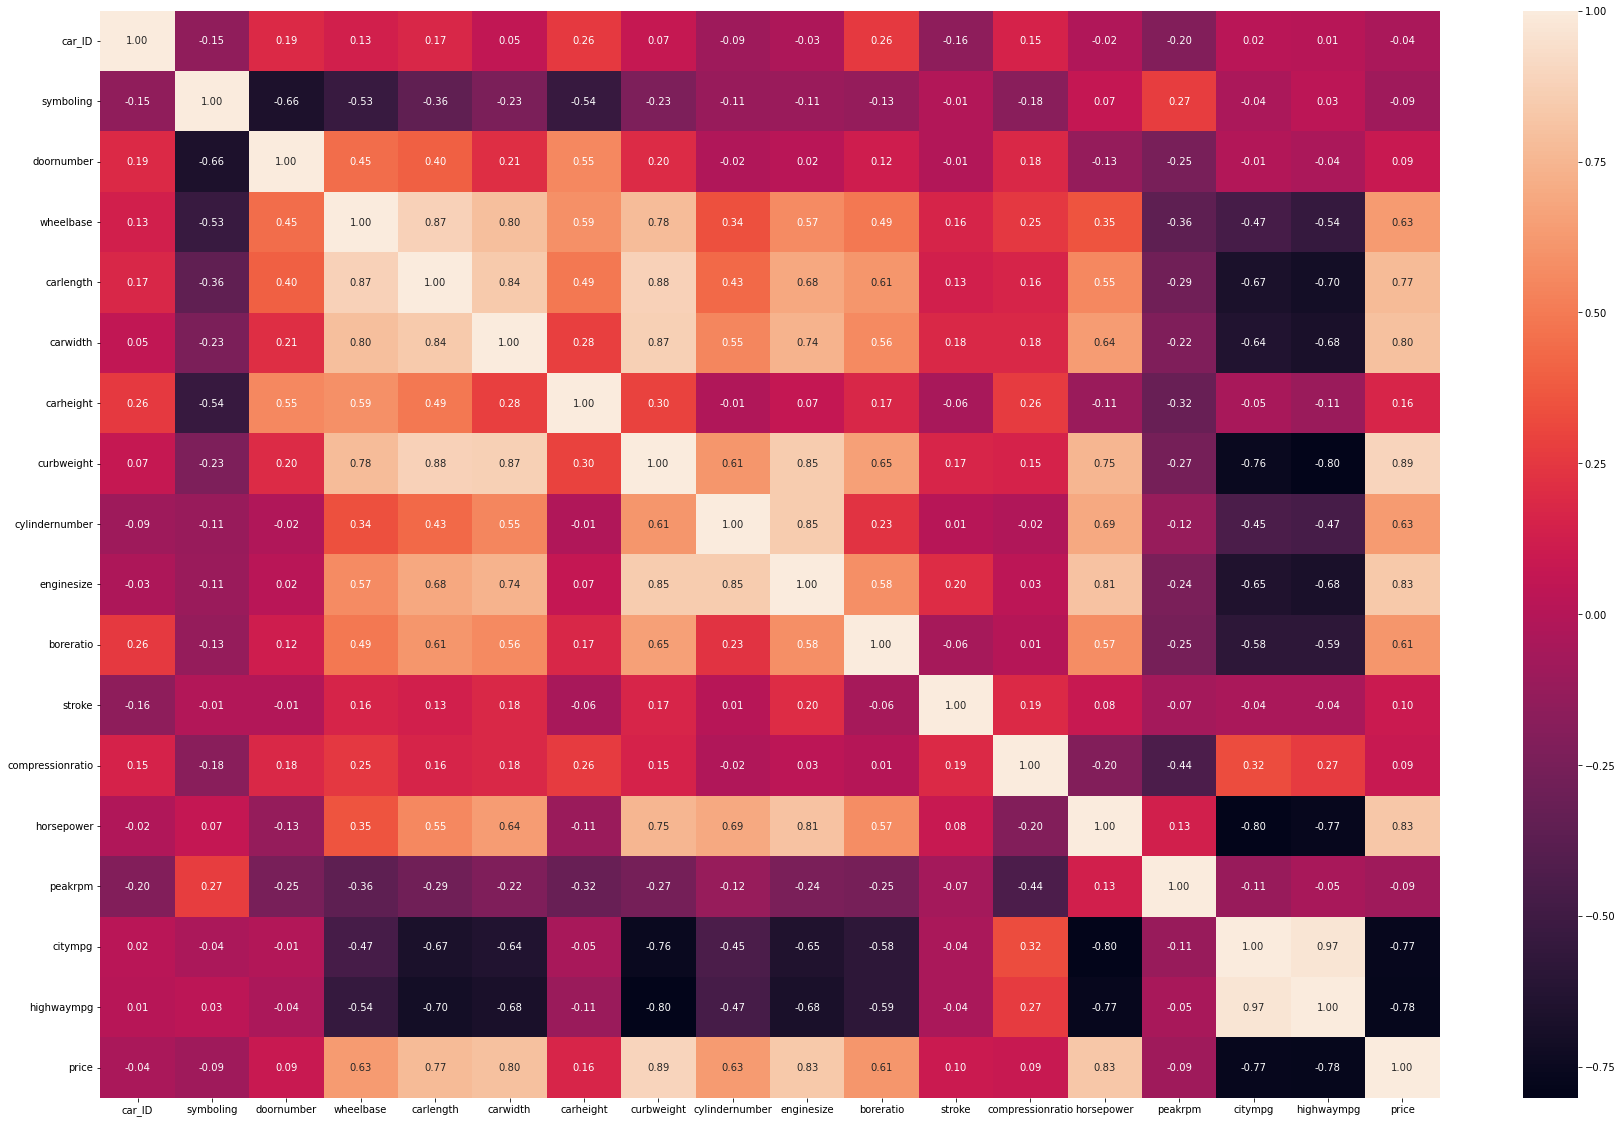

In [12]:
# Correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

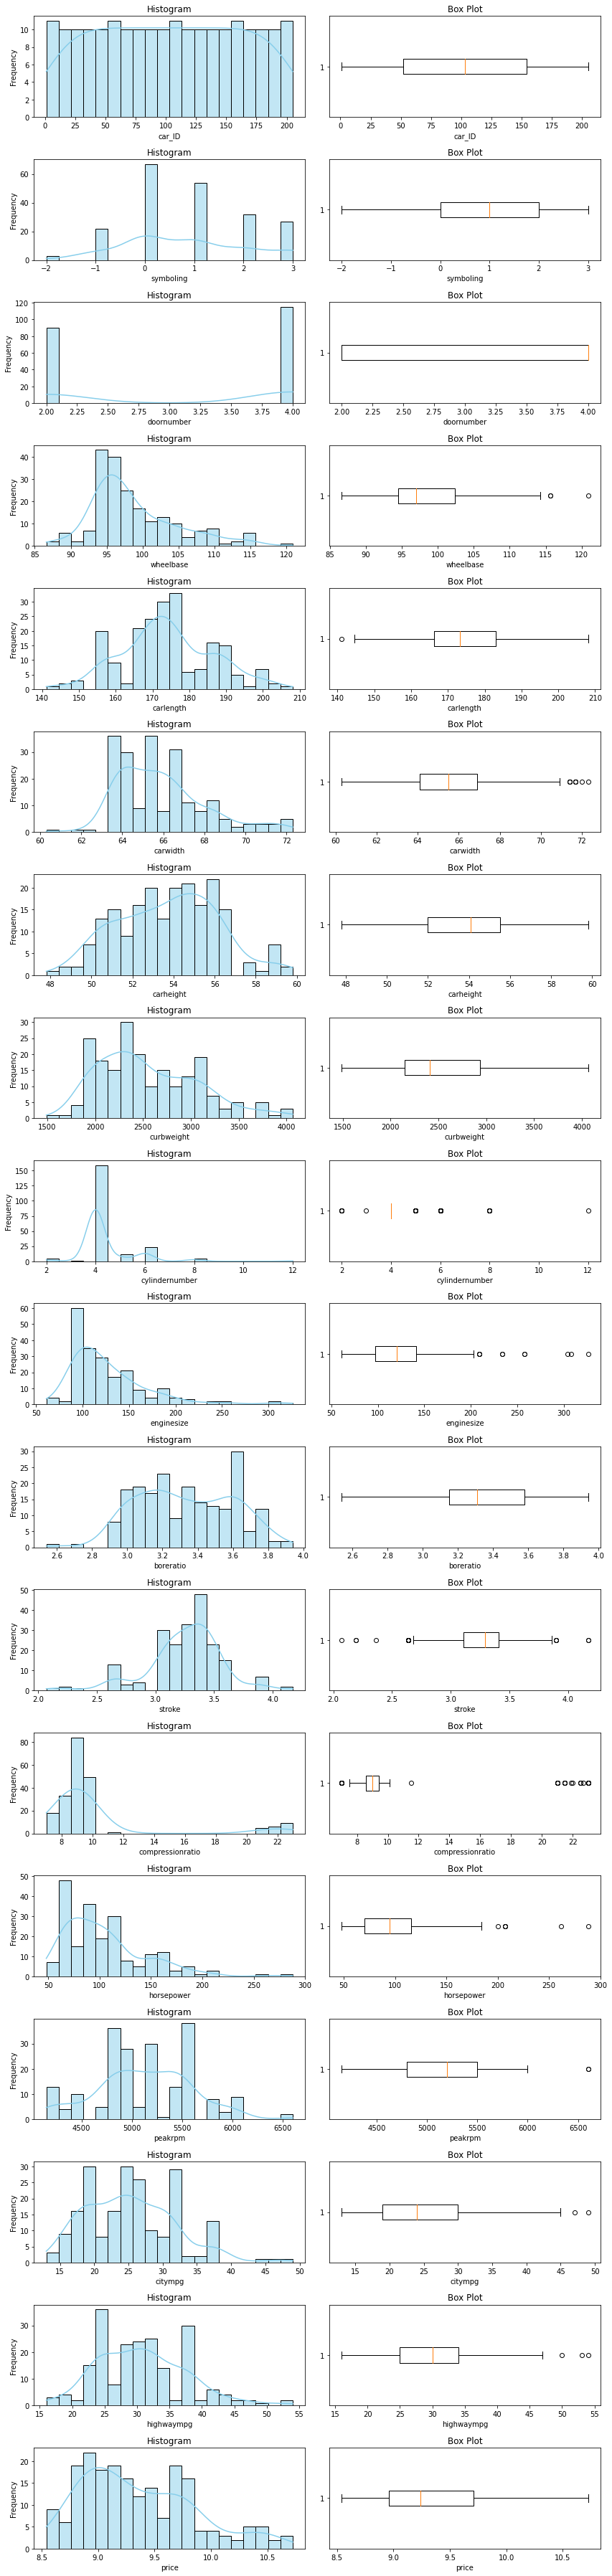

In [13]:
# Plot histograms and box plots for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, bins=20, color='skyblue', kde=True, ax=axes[i, 0])
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

plt.tight_layout()
plt.show()

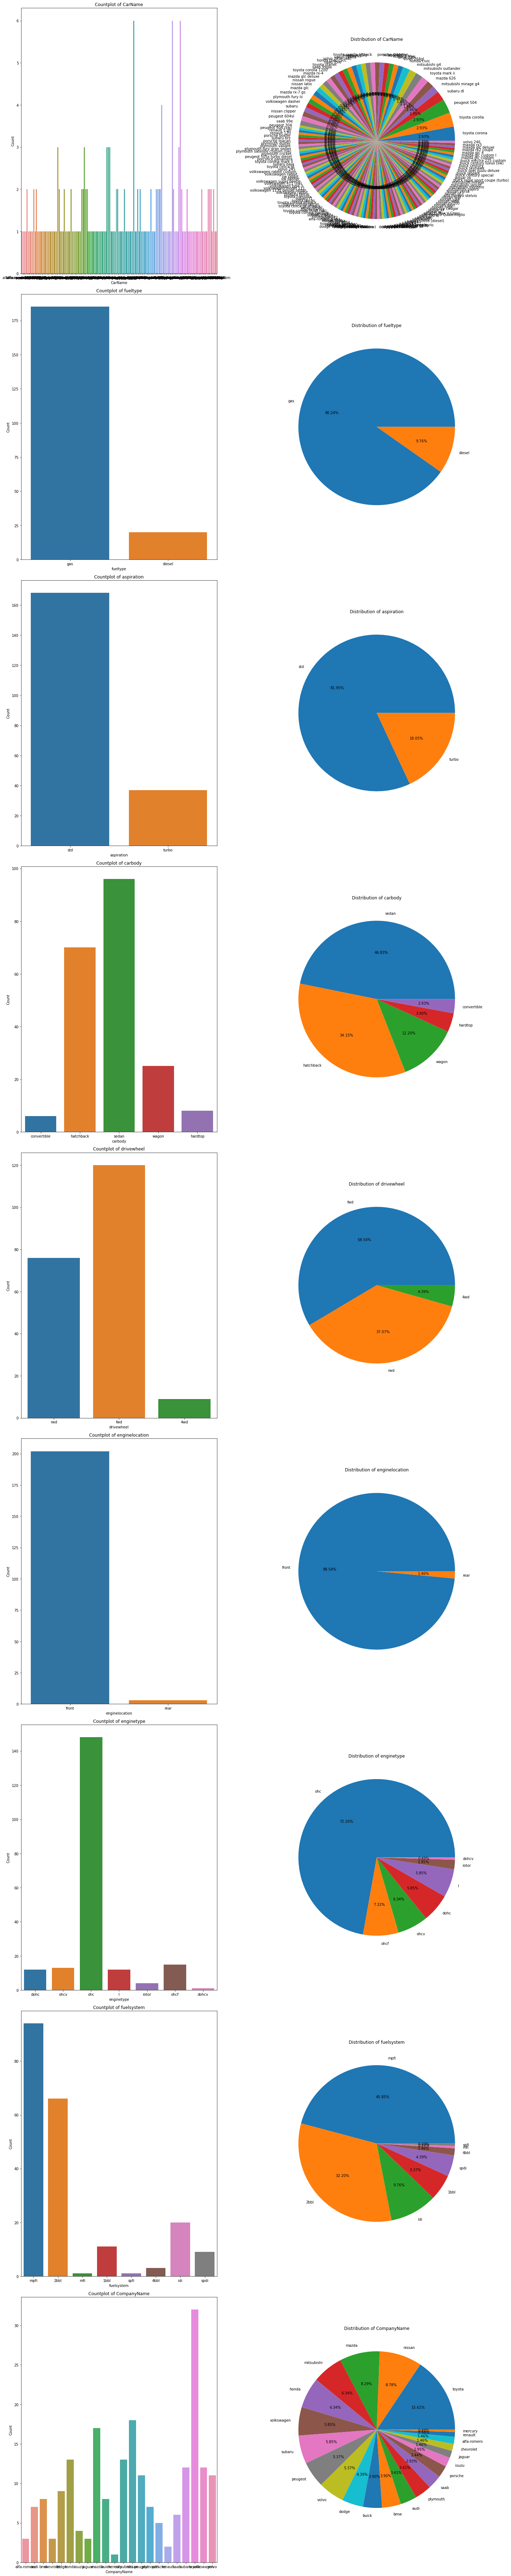

In [14]:
# Count plots and pie charts for categorical columns
cat = [column for column in df.columns if df[column].dtype == object]
fig, axes = plt.subplots(nrows=len(cat), ncols=2, figsize=(20, 100))

for i, column in enumerate(cat):
    sns.countplot(x=column, data=df, ax=axes[i, 0])
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_title('Countplot of ' + column)

    df[column].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[i, 1])
    axes[i, 1].set_title('Distribution of ' + column)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

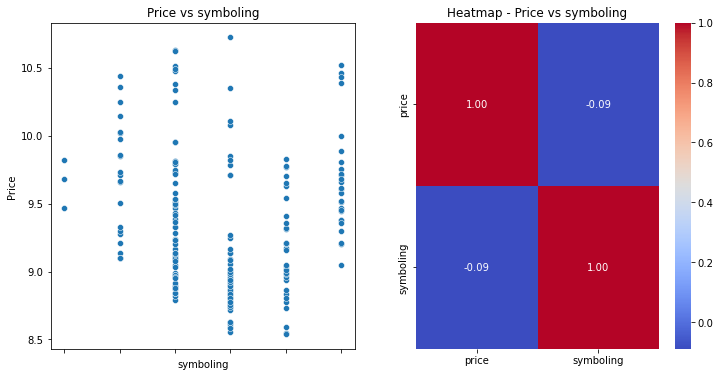

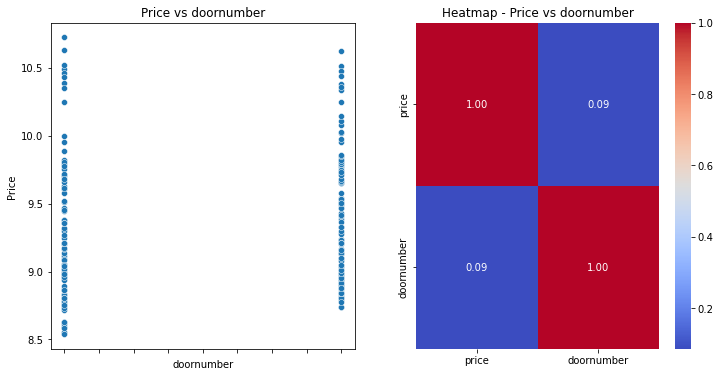

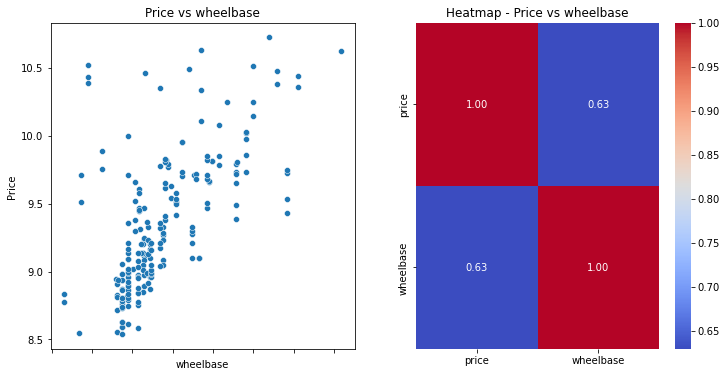

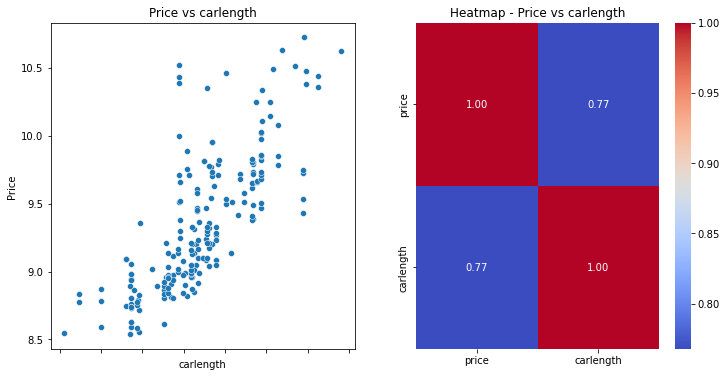

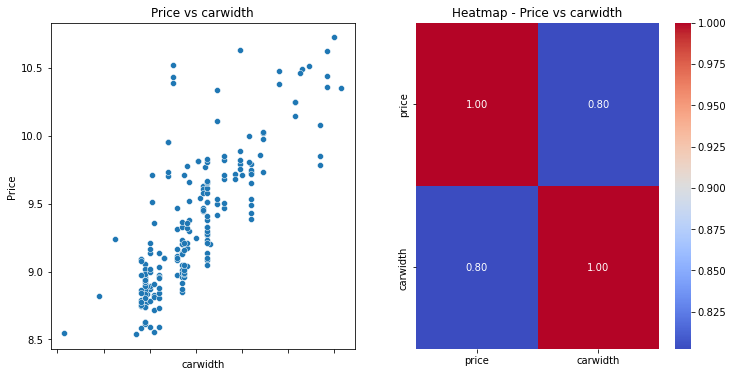

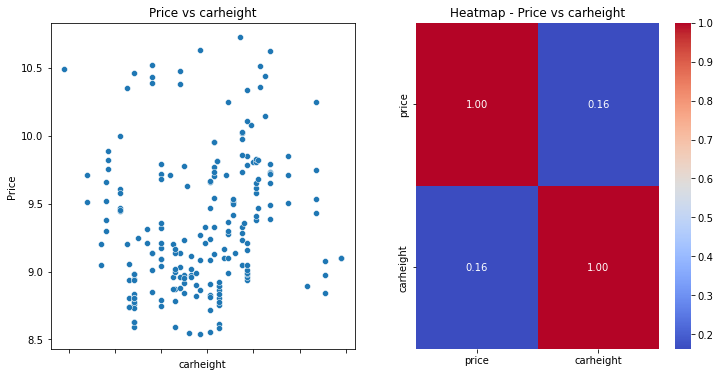

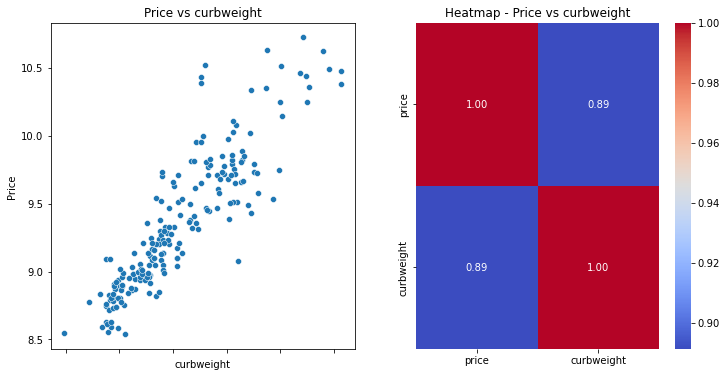

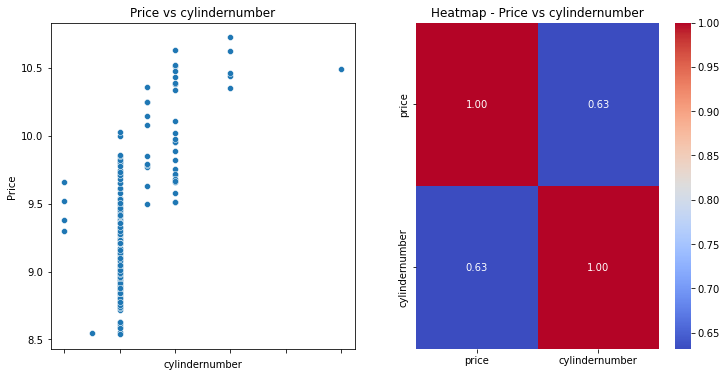

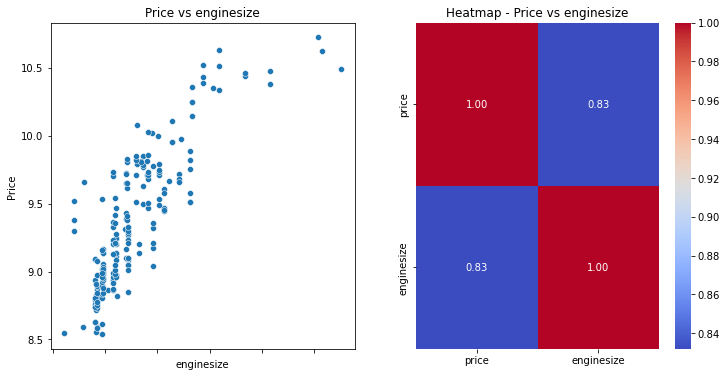

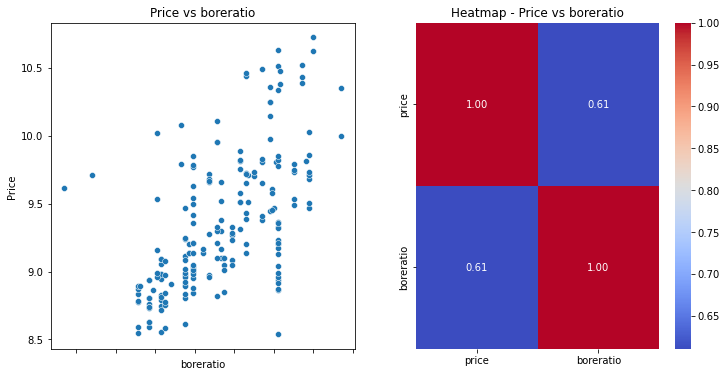

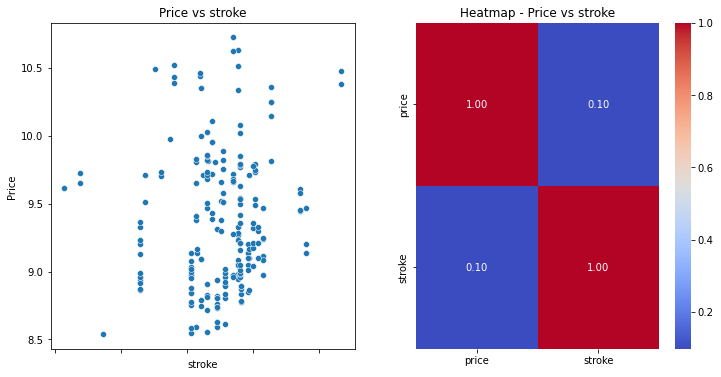

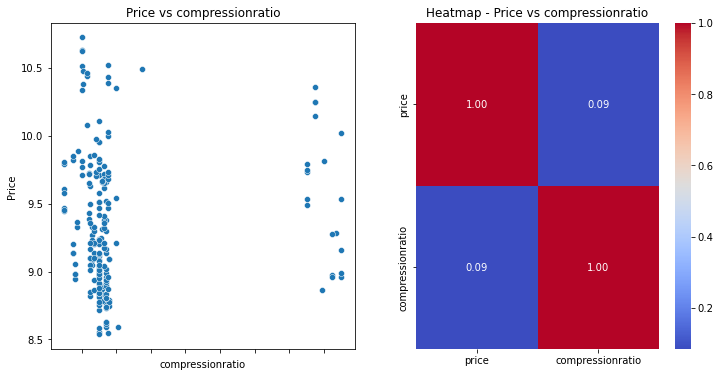

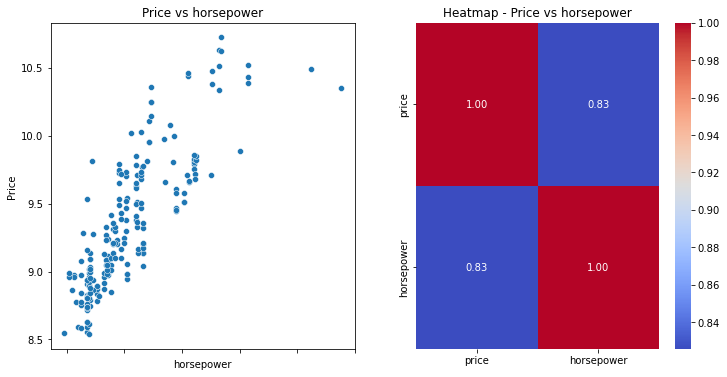

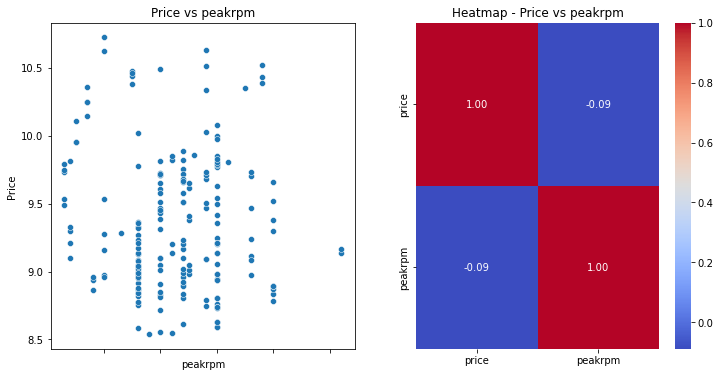

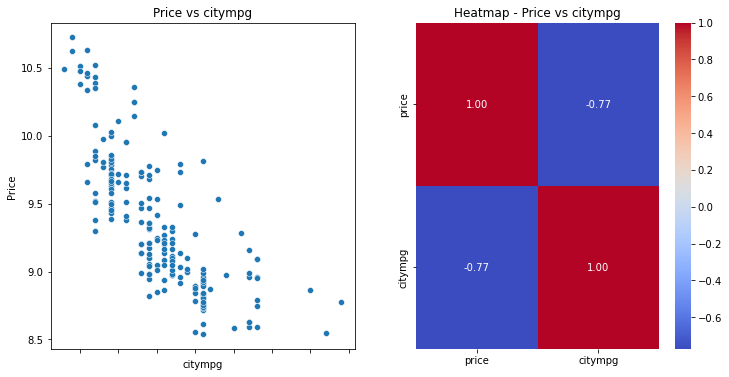

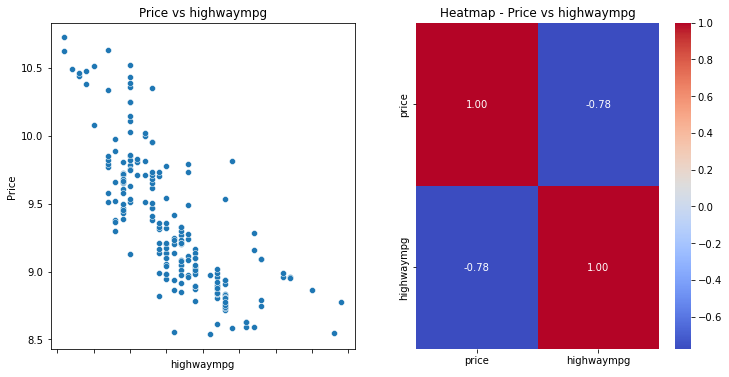

In [15]:
# Scatter plots and heatmaps for numerical columns vs. 'price'
numerical_columns = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.scatterplot(x=df[column], y=df['price'], ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Price')
    axes[0].set_title('Price vs ' + column)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

    sns.heatmap(df[['price', column]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
    plt.title("Heatmap - Price vs " + column)

    plt.show()

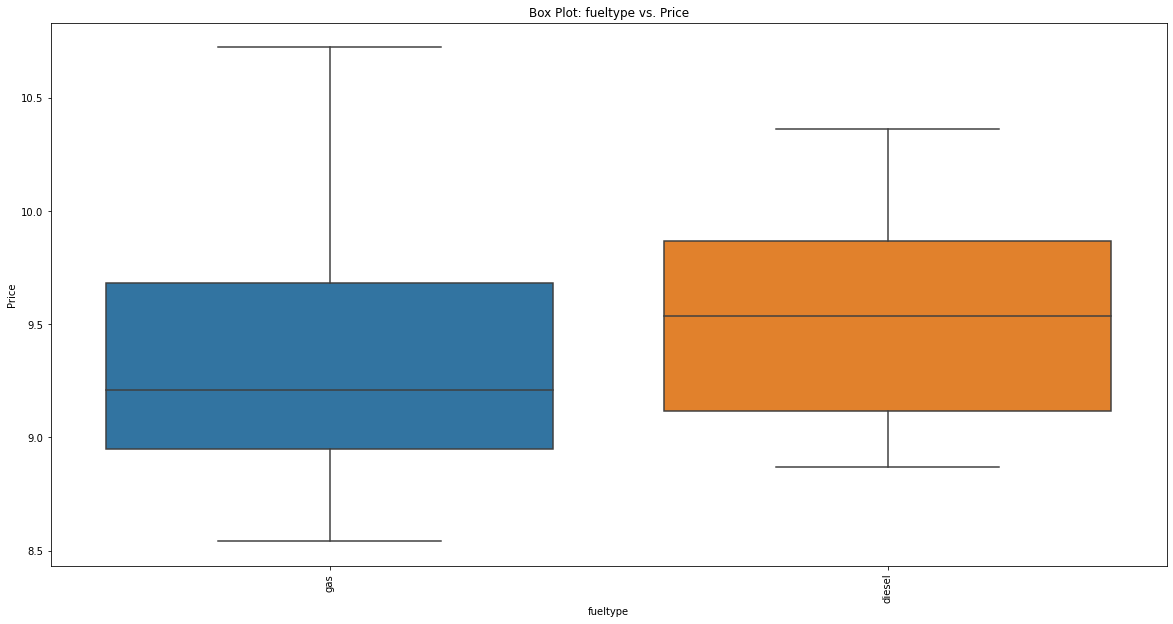

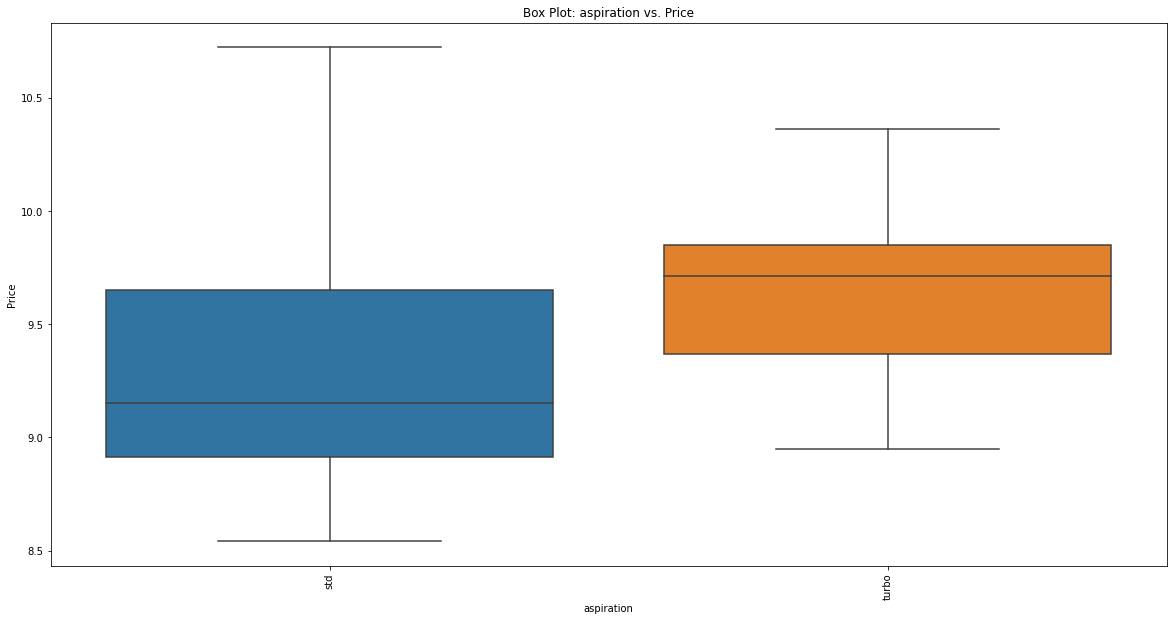

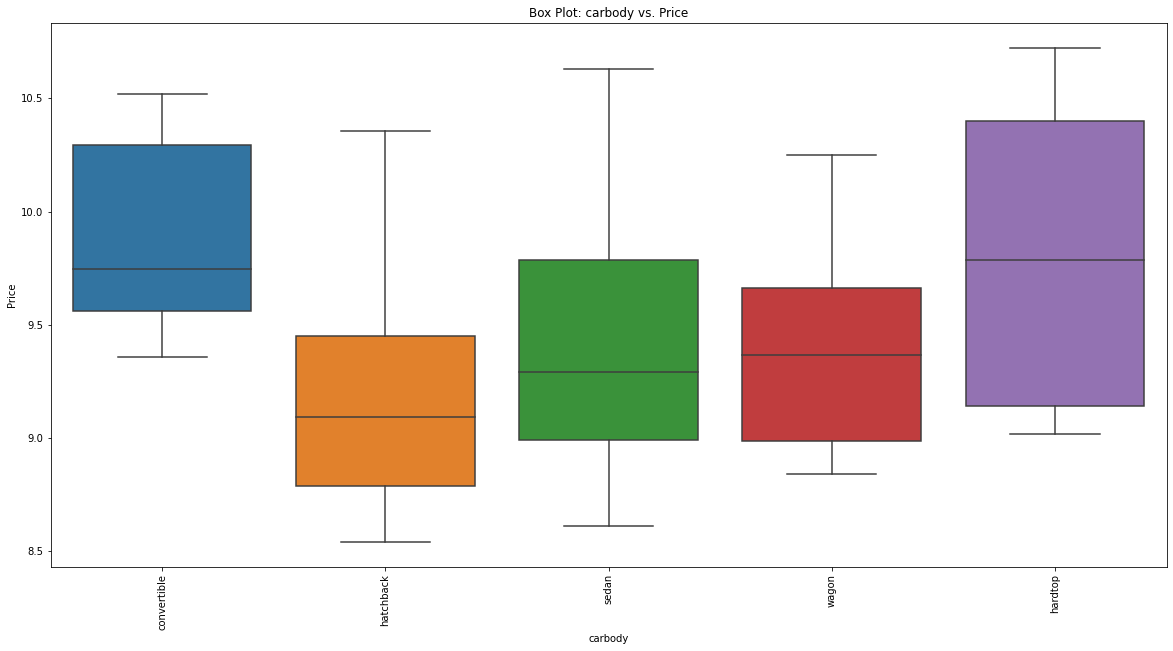

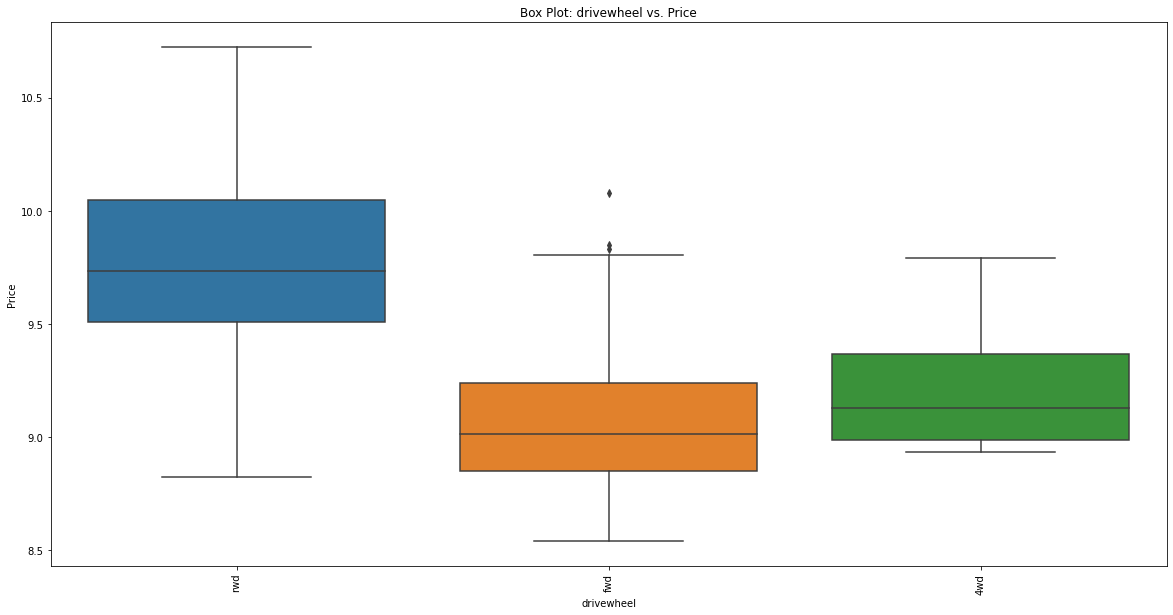

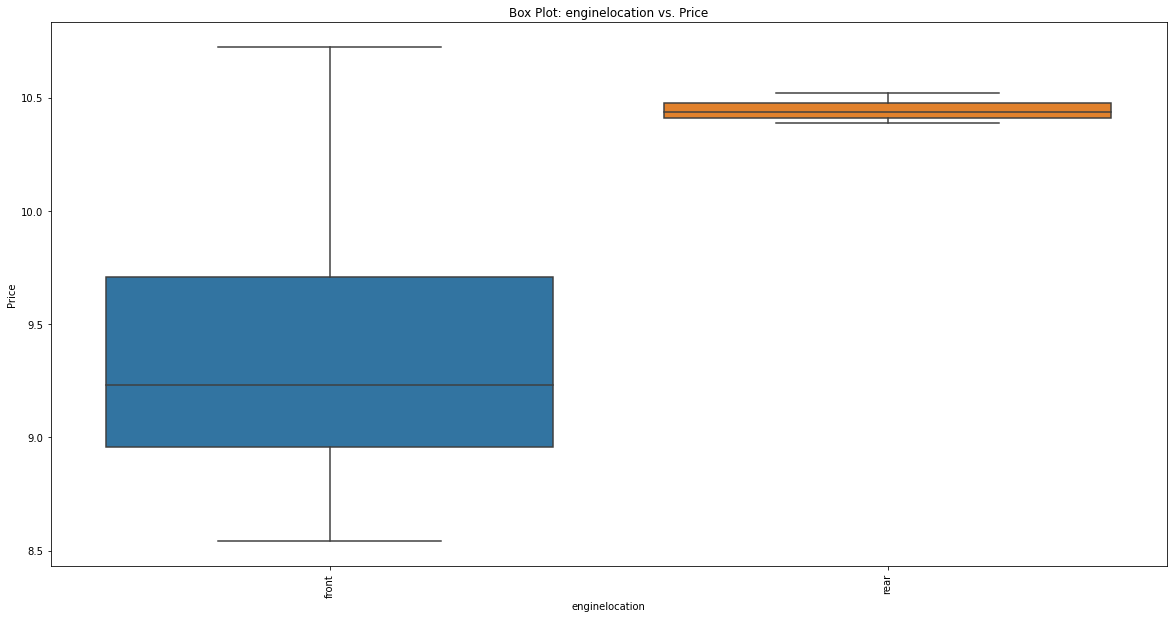

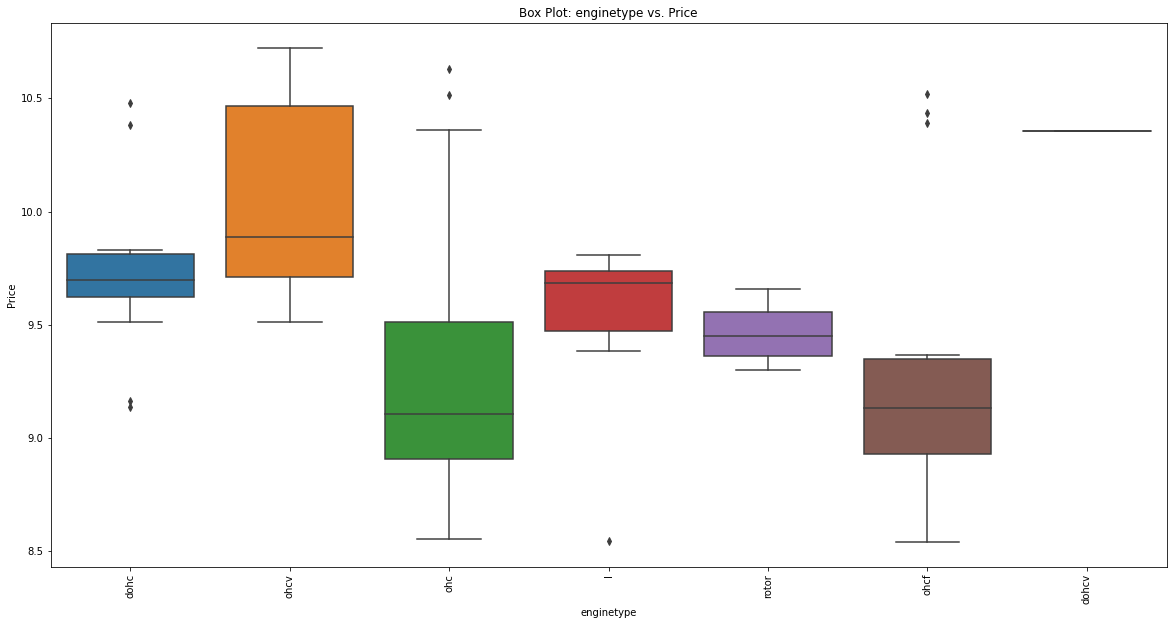

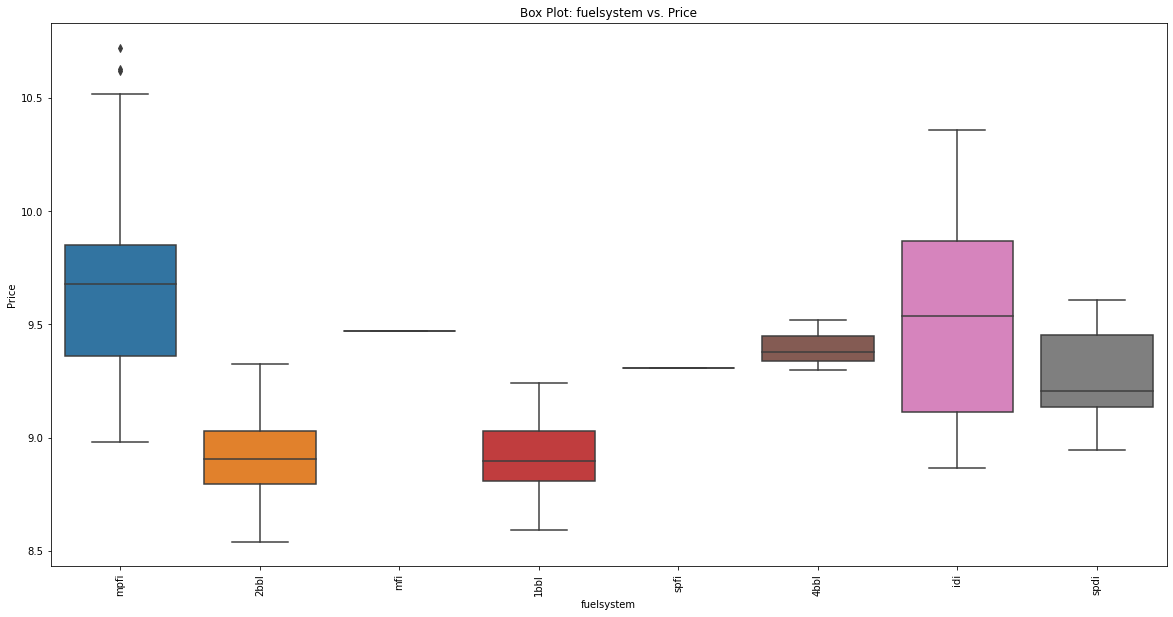

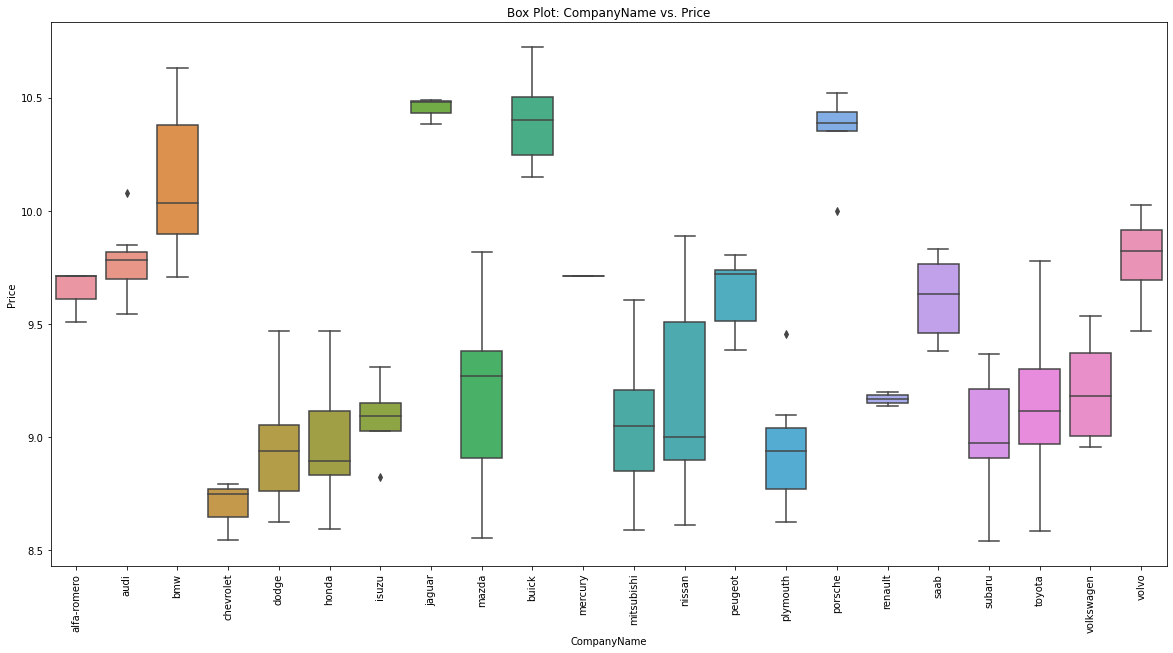

In [16]:
# Box plots for categorical columns vs. 'price'
categorical_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'CompanyName']

for column in categorical_columns:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df, x=column, y='price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Box Plot: {column} vs. Price')
    plt.xticks(rotation=90)
    plt.show()

In [17]:
# Data Preprocessing
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [18]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [25]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Model Score: {score*100:.2f}")

Linear Regression Model Score: 83.64
Decision Tree Model Score: 81.48
Random Forest Model Score: 86.95


In [28]:
# Convert log-transformed prices back to the original price scale
original_price_predictions = {name: np.exp(predictions[name]) for name in models.keys()}
original_price_actual = np.exp(y_test.values)

# Create a DataFrame to store the original prices and predictions
results_original_df = pd.DataFrame({
    'Actual Price': original_price_actual,
    **{f'Predicted Price - {name}': original_price_predictions[name] for name in models.keys()}
})

# Display the first few rows of the comparison DataFrame
print(results_original_df.head())

   Actual Price  Predicted Price - Linear Regression  \
0        6795.0                          6563.531418   
1       15750.0                         19241.560029   
2       15250.0                         12831.409722   
3        5151.0                          4146.650325   
4        9995.0                          9841.061501   

   Predicted Price - Decision Tree  Predicted Price - Random Forest  
0                           6095.0                      6160.978610  
1                          15690.0                     18222.926634  
2                           9298.0                     12049.872952  
3                           6575.0                      6255.792219  
4                           8921.0                      9242.649100  
